<a href="https://colab.research.google.com/github/porygon-tech/ECO/blob/main/structural_stability/tutorial_rohr2014Structural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Specifically, the dynamical model has the following form

$$
\left\{\begin{array}{l}
\frac{d P_i}{d t}=P_i\left(\alpha_i^{(P)}-\sum_j \beta_{i j}^{(P)} P_j+\frac{\sum_j \gamma_{i j}^{(P)} A_j}{1+h \sum_j \gamma_{i j}^{(P)} A_j}\right) \\
\frac{d A_i}{d t}=A_i\left(\alpha_i^{(A)}-\sum_j \beta_{i j}^{(A)} A_j+\frac{\sum_j \gamma_{i j}^{(A)} P_j}{1+h \sum_j \gamma_{i j}^{(A)} P_j}\right)
\end{array}\right.
$$

In [3]:
def pdot (p,a,alpha_P,beta_P,gamma_P,h):
	gP_temp = np.sum(gamma_P*a.T)
	return p*(alpha_P - np.sum(beta_P*p.T) + gP_temp/(1+h*gP_temp))

def adot (a,p,alpha_A,beta_A,gamma_A,h):
	gA_temp = np.sum(gamma_A*p.T)
	return a*(alpha_A - np.sum(beta_A*a.T) + gA_temp/(1+h*gA_temp))

In [14]:
def showdata(mat, color=plt.cm.gnuplot, symmetry=False):
	mat = np.copy(mat)
	if symmetry:
		top = np.max([np.abs(np.nanmax(mat)),np.abs(np.nanmin(mat))])
		plt.imshow(mat.astype('float32'), interpolation='none', cmap='seismic',vmax=top,vmin=-top)
	else:
		plt.imshow(mat.astype('float32'), interpolation='none', cmap=color)
	plt.colorbar()
	plt.show()

In [28]:
n_P = 5
n_A = 9
h=0.1 # saturating constant of the beneficial effect of mutualisms, aka handling time. If h=0, the model becomes linear
time_delta=0.001

duration=10
ntimesteps=int(duration/time_delta)
p0 = np.random.randint(50,200,n_P)[:,np.newaxis].astype('float64')
a0 = np.random.randint(50,200,n_A)[:,np.newaxis].astype('float64')

In [29]:
alpha_P = np.random.rand(n_P)[:,np.newaxis]*2
beta_P  = np.random.rand(n_P,n_P)*0.1
gamma_P = np.random.rand(n_P,n_A)*5

alpha_A = np.random.rand(n_A)[:,np.newaxis]*4
beta_A  = np.random.rand(n_A,n_A)*0.1
gamma_A = np.random.rand(n_A,n_P)*5

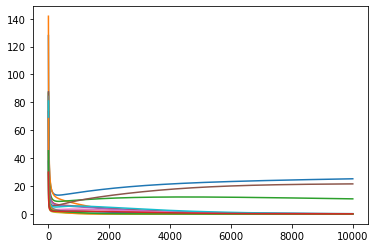

In [30]:
p = p0.copy()
a = a0.copy()
timeseries=np.zeros((n_P+n_A,ntimesteps))
for t in range(ntimesteps):
  p+=pdot(p,a,alpha_P,beta_P,gamma_P,h)*time_delta
  a+=adot(a,p,alpha_A,beta_A,gamma_A,h)*time_delta
  timeseries[:n_P ,t] = p.flatten()
  timeseries[ n_P:,t] = a.flatten()

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(timeseries.T)
plt.show()

# Model of mutualism

In [40]:
#h       = 0   
rho     = 0.2 # interspecies competition (intraguild)
delta   = 0.5 # mutualistic trade off
gamma_0 = 0.2 # level of mutualistic strength

First, let's set the vector of growth rates

In [ ]:
#alpha is the growth rate vector
alpha_A = np.random.normal(2,0.1,(n_A, 1))
alpha_P = np.random.normal(3,0.1,(n_P, 1))

#a is the growth rate vector
a = np.append(alpha_P,alpha_A,0)

In the absence of empirical information about interspecific competition, we use a mean field approximation for the competition parameters, where we set the diagonal elements of both $\beta$ matrices to 1 and the off-diagonals to $\rho<1$.

In [33]:
beta_A  = rho + np.zeros((n_A, n_A))
beta_P  = rho + np.zeros((n_P, n_P))

for i in range(n_A):
	beta_A[i,i]=1

for i in range(n_P):
	beta_P[i,i]=1

Now we create the bipartite network through a randomized matrix, where $y_{ij}=1$ if species $i$ and $j$ interact and zero otherwise.

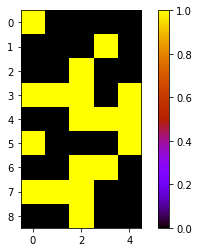

In [34]:
prob=0.4 #expected connectance
y = np.random.choice((0,1),(n_A,n_P), p=(1-prob, prob))
while np.any(y.sum(0)==0) or np.any(y.sum(1)==0):
    y = np.random.choice((0,1),(n_A,n_P), p=(1-prob, prob));
showdata(y)

As shown in a [previous study](https://www.nature.com/articles/ncomms3350?origin=ppub), the mutualistic benefit can be
further disentangled by
$\gamma_{i j}=\left(\gamma_0 y_{i j}\right) /\left(k_i^\delta\right)$

In [41]:
#k is the node degree
k_A=y.sum(1)[:,np.newaxis]
k_P=y.sum(0)[:,np.newaxis]

gamma_A = (gamma_0*y  )/k_A**delta
gamma_P = (gamma_0*y.T)/k_P**delta

# Stability condition



We investigated the conditions in our dynamical system that any feasible equilibrium point needs to satisfy to be globally stable. To derive these conditions, we started by studying the linear Lotka-Volterra approximation (h = 0) of the dynamical model (Eq. 2). In this linear approximation, the model reads

$$
\left[\begin{array}{l}
\frac{d P}{d t} \\
\frac{d A}{d t}
\end{array}\right]=\operatorname{diag}\left(\left[\begin{array}{l}
P \\
A
\end{array}\right]\right)
\times \left(\left[\begin{array}{l}
\alpha^{(P)} \\
\alpha^{(A)}
\end{array}\right]-\underbrace{\left[\begin{array}{cc}
\beta^{(P)} & -\gamma^{(P)} \\
-\gamma^{(A)} & \beta^{(A)}
\end{array}\right]}_{:=B}\left[\begin{array}{l}
P \\
A
\end{array}\right]\right)
$$

Now with $\beta$ and $\gamma$ we can construct $B$, which is a two-by-two block matrix embedding all the interaction strengths.


$$ 
B=\left[\begin{array}{cc}
\beta^{(P)} & -\gamma^{(P)} \\
-\gamma^{(A)} & \beta^{(A)}
\end{array}\right]
$$

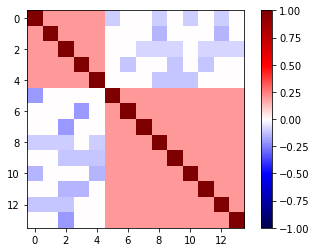

In [42]:
#B is the interaction matrix
B = np.append(np.append(beta_P,-gamma_P, axis=1), np.append(-gamma_A, beta_A,axis=1), axis=0); showdata(B,symmetry=True)

1.   For this model, it has been proved that an interaction matrix $B$ that is Lyapunov–diagonally stable grants the global stability of any potential feasible equilibrium.

2.   For some classes of matrices (symmetric matrices and Z-matrices, i.e. when off-diagonal elements are nonpositive), Lyapunov stability and Lyapunov diagonal stability are equivalent conditions. This makes it easier to test for Lyapunov diagonal stability, and therefore also for the property of granting global stability to any potential feasible equilibrium.

3.   Our interaction strength matrix B is either symmetric when
the mutualistic trade-off is zero ($\delta = 0$) or is a Z-matrix when the interspecific competition is zero ($\rho = 0$).



In [ ]:
beta_A  = rho + np.zeros((n_A, n_A))
beta_P  = rho + np.zeros((n_P, n_P))

for i in range(n_A):
	beta_A[i,i]=1

for i in range(n_P):
	beta_P[i,i]=1